<a href="https://colab.research.google.com/github/Prav2904/numpy1/blob/master/Loan_status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [6]:
# Loading the dataset to pandas dataframe

train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')


In [7]:
train_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
type(train_dataset)


pandas.core.frame.DataFrame

In [10]:
print(train_dataset.shape)
print(test_dataset.shape)


(614, 13)
(367, 12)


In [11]:
train_dataset.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
train_dataset.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
test_dataset.isnull().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
train_dataset = train_dataset.dropna()


In [15]:
test_dataset = test_dataset.dropna()


In [16]:
train_dataset.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
train_dataset.shape


(480, 13)

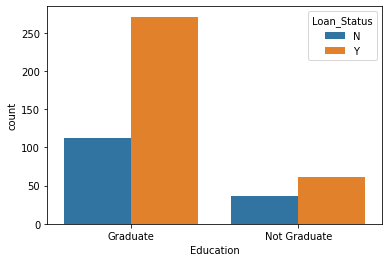

In [18]:
sns.countplot(x='Education', hue='Loan_Status', data=train_dataset)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

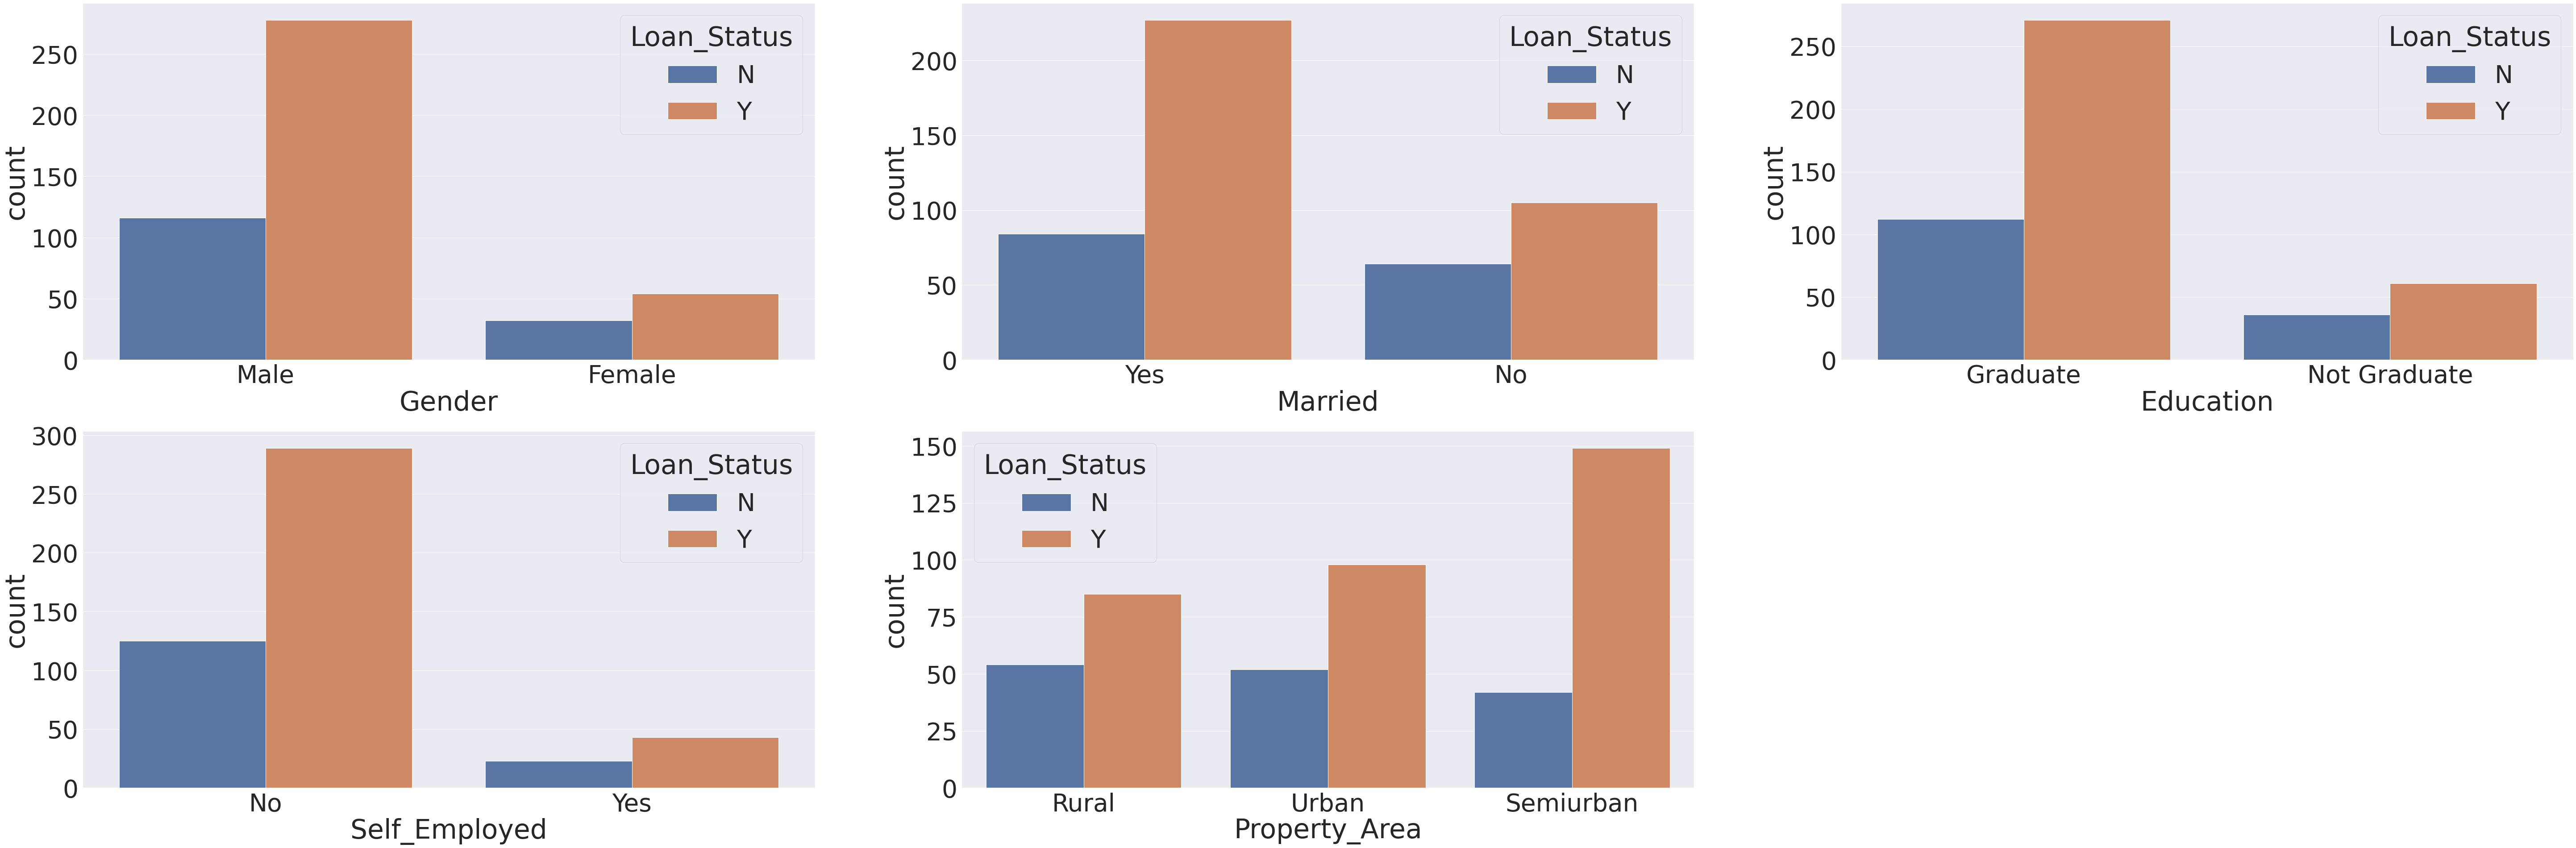

In [19]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(train_dataset['Gender'],hue=train_dataset['Loan_Status'])

plt.subplot(332)
sns.countplot(train_dataset['Married'],hue=train_dataset['Loan_Status'])

plt.subplot(333)
sns.countplot(train_dataset['Education'],hue=train_dataset['Loan_Status'])

plt.subplot(334)
sns.countplot(train_dataset['Self_Employed'],hue=train_dataset['Loan_Status'])

plt.subplot(335)
sns.countplot(train_dataset['Property_Area'],hue=train_dataset['Loan_Status'])

In [20]:
train_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [21]:
train_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [22]:
train_dataset['Dependents'].value_counts()


0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [23]:
train_dataset = train_dataset.replace(to_replace='3+',value='4')
test_dataset = test_dataset.replace(to_replace='3+',value='4')
train_dataset['Dependents'].value_counts()


0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [24]:
test_dataset['Dependents'].value_counts()


0    167
2     50
1     42
4     30
Name: Dependents, dtype: int64

In [25]:
train_dataset.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)
train_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [26]:
train_dataset['Gender'].value_counts()


Male      394
Female     86
Name: Gender, dtype: int64

In [27]:
train_dataset.replace({"Gender":{'Male':0,'Female':1}},inplace=True)
train_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,Yes,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,Yes,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,Yes,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,No,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,0,Yes,2,Graduate,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [28]:
train_dataset['Gender'].value_counts()


0    394
1     86
Name: Gender, dtype: int64

In [29]:
train_dataset['Education'].value_counts()


Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [30]:
train_dataset.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)
train_dataset['Education'].value_counts()


1    383
0     97
Name: Education, dtype: int64

In [31]:
train_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,Yes,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,Yes,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,No,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,0,Yes,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [32]:
train_dataset['Property_Area'].value_counts()


Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [33]:
train_dataset.replace({"Property_Area":{'Semiurban':0,'Urban':1,'Rural':2}},inplace=True)


In [34]:
train_dataset['Property_Area'].value_counts()


0    191
1    150
2    139
Name: Property_Area, dtype: int64

In [35]:
train_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,Yes,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,Yes,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,No,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,Yes,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [36]:
train_dataset['Married'].value_counts()


Yes    311
No     169
Name: Married, dtype: int64

In [37]:
train_dataset.replace({"Married":{'Yes':1,'No':0}},inplace=True)
train_dataset['Married'].value_counts()


1    311
0    169
Name: Married, dtype: int64

In [38]:
train_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [39]:
test_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':0,'Female':1},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
test_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0,2
5,LP001054,0,1,0,0,1,2165,3422,152.0,360.0,1.0,2


In [40]:
X_train = train_dataset.drop(columns=['Loan_ID','Loan_Status'])
Y_train = train_dataset['Loan_Status']
X_train


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,2
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,2
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [41]:
Y_train

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [42]:
test_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0,2
5,LP001054,0,1,0,0,1,2165,3422,152.0,360.0,1.0,2


In [43]:
X_test = test_dataset.drop(columns=['Loan_ID'])


In [44]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2
4,0,0,0,0,0,3276,0,78.0,360.0,1.0,2
5,0,1,0,0,1,2165,3422,152.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
361,0,1,1,1,0,2269,2167,99.0,360.0,1.0,1
362,0,1,4,0,1,4009,1777,113.0,360.0,1.0,2
363,0,1,0,1,0,4158,709,115.0,360.0,1.0,2
365,0,1,0,1,0,5000,2393,158.0,360.0,1.0,0


Data Standadisation

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler()


StandardScaler()

In [46]:
X_train = scaler.transform(X_train)
X_train


array([[-0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694,  1.34825769],
       [-0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694,  0.13178459],
       [-0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694,  0.13178459],
       ...,
       [-0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694,  0.13178459],
       [-0.46719815,  0.73716237,  0.92945899, ...,  0.27554157,
         0.41319694,  0.13178459],
       [ 2.14041943, -1.35655324, -0.70475462, ...,  0.27554157,
        -2.42015348, -1.08468851]])

Modeling - Support Vector Machine Model


In [48]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)



SVC(kernel='linear')

Model Evaluation


In [49]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(training_data_accuracy)
0.8083333333333333
X_test.to_csv('testnew.csv')


0.8083333333333333


Predictive System


In [50]:
input = (0,1,0,1,0,5720,0,110.0,360.0,1.0,2)
#Changing the input data to numpy array

npinput = np.asarray(input)
#reshaping array as we are predicting for one instance

rsinput = npinput.reshape(1,-1)
#standardising the reshaped data

std_data = scaler.transform(rsinput)
print(std_data)


[[-0.46719815  0.73716237 -0.70475462  0.50325312 -0.3992747   0.06283065
  -0.604633   -0.43190223  0.27554157  0.41319694  1.34825769]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [51]:
prediction = classifier.predict(std_data)
if prediction[0]==1:
    print("Loan is approved")
else:
    print("Loan is not approved")


Loan is approved
